In [17]:
import pandas as pd
import numpy as np

In [18]:
data_path = '../clustering/gem_candidates_soft.csv'
df_all_features = pd.read_csv(data_path)
# print(f'columns: {df_all_features.columns}')
df_all_features

,business_id,stars,review_count,attr_score,cat_score,avg_review_stars,std_review_stars_scaled,pos_review_ratio,neg_review_ratio,neu_review_ratio,...,avg_user_avg_stars,elite_user_ratio,avg_user_account_age_days,avg_user_review_count_log_scaled,avg_user_useful_log_scaled,avg_user_funny_log_scaled,avg_user_cool_log_scaled,avg_user_fans_log_scaled,avg_user_compliments_log_scaled,gem_label
0,il_Ro8jwPlHresjw9EGmBg,-1.132288,-0.212222,6.5,1.670499,2.413793,0.776556,0.448276,0.379310,0.172414,...,3.072069,0.172414,-0.875370,-0.819606,-0.778717,-1.033356,-0.647838,-0.889185,-0.525681,0
1,qhDdDeI3K4jy2KyzwFN53w,0.383586,-0.121393,0.0,1.000000,4.052632,-0.294102,0.605263,0.078947,0.315789,...,4.029737,0.631579,1.144675,1.419795,1.500704,1.589323,1.493492,1.751805,1.518337,1
2,kfNv-JZpuN6TVNSO6hHdkw,0.383586,-0.284884,2.5,1.000000,3.950000,0.515631,0.750000,0.100000,0.150000,...,4.003500,0.250000,-1.674202,0.135378,-0.065015,-0.173017,-0.074152,-0.423573,-0.281522,0
3,x1mhq4IpWctQOBM06dU8vg,-2.142871,-0.239470,0.5,1.692475,1.600000,0.036412,0.280000,0.600000,0.120000,...,2.148800,0.040000,-1.743473,-1.965375,-1.567713,-1.487938,-1.922442,-1.315666,-1.999048,0
4,seKihQKpGGnCeLuELRQPSQ,-0.121706,1.867748,5.5,2.185136,3.333333,0.525084,0.518519,0.211111,0.270370,...,3.611852,0.255556,-0.321709,0.125148,0.827640,0.988959,1.010086,-0.197925,0.322949,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5330,2f1ZnZg7730yChhV24ARJw,-0.121706,-0.066896,0.0,1.381861,3.346939,0.496569,0.428571,0.265306,0.306122,...,3.660612,0.346939,-0.085839,0.159726,0.208484,0.743959,0.339780,0.322353,0.582125,0
5331,AM7O0cwkxm6w_e0Q7-f9FQ,0.383586,-0.203139,0.0,1.381861,3.866667,0.558162,0.633333,0.233333,0.133333,...,3.778333,0.366667,-1.488153,-0.101261,-0.306420,-0.299942,-0.240725,-0.332186,-0.332175,0
5332,Gi1QPLu_y8rLS3uTN9Z_VA,-0.626997,-0.357547,0.0,1.000000,3.083333,1.526495,0.500000,0.500000,0.000000,...,3.125000,0.083333,-0.005377,-0.278233,-0.632478,-0.440149,-0.813292,-0.558896,-0.932551,0
5333,fn3ybdsRSrIDpKZTsRuAWg,0.383586,-0.357547,0.0,2.208772,4.083333,0.853708,0.750000,0.250000,0.000000,...,3.890000,0.083333,1.851451,-0.627310,-0.471674,-0.359534,-0.366096,-0.501931,-0.635779,0


In [19]:
df_cluster1_features = df_all_features[df_all_features['gem_label'] == 1].copy()

In [20]:
df_cluster1_features.to_csv('business_cluster1_features.csv', index=False)

In [21]:
business_path = "../city_filter/businesses_Indianapolis.csv"
df_business = pd.read_csv(business_path)
cluster1_info = df_business[df_business['business_id'].isin(df_cluster1_features['business_id'])].copy()
cluster1_info.to_csv('business_cluster1_info.csv', index=False)

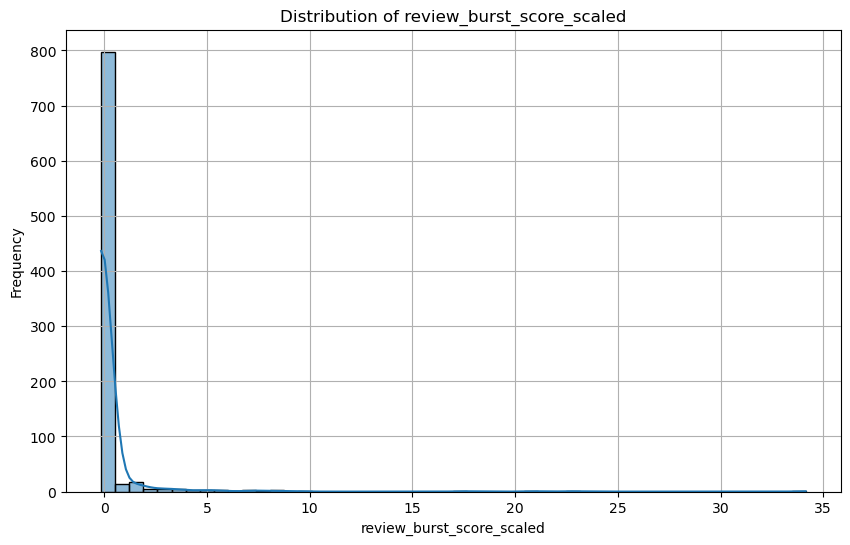

In [22]:
# review_burst_score_scaled 的分布
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cluster1_features['review_burst_score_scaled'], bins=50, kde=True)
plt.title('Distribution of review_burst_score_scaled')  
plt.xlabel('review_burst_score_scaled')
plt.ylabel('Frequency')
plt.grid()  


In [23]:
cluster1_review_burst_score_scaled_sorted = df_cluster1_features[['business_id', 'review_burst_score_scaled']].sort_values(by='review_burst_score_scaled', ascending=False)
cluster1_review_burst_score_scaled_sorted = cluster1_review_burst_score_scaled_sorted.reset_index(drop=True)
cluster1_review_burst_score_scaled_sorted.to_csv('business_cluster1_review_burst_score_sorted.csv', index=False)

In [ ]:
def assign_potential_score_by_quantile(row, count_q25, count_median, count_q75):
    if row['avg_review_stars'] >= 4.5:
        if row['review_count'] <= count_q25:
            return 1.0
        elif row['review_count'] <= count_median:
            return 0.9
        elif row['review_count'] <= count_q75:
            return 0.8
        else:
            return 0.55
    elif row['avg_review_stars'] >= 4.2:
        if row['review_count'] <= count_q25:
            return 0.85
        elif row['review_count'] <= count_median:
            return 0.7
        elif row['review_count'] <= count_q75:
            return 0.6
        else:
            return 0.4
    else:
        return 0.3


def enhance_score(row, base_score):
    bonus = 0
    burst_score_delta = row['review_burst_score_scaled'] - 0.5
    burst_score_bonus = 0.2 * burst_score_delta if burst_score_delta > 0 else 0
    bonus += burst_score_bonus
    bonus += 0.10 if row['recent_review_ratio'] > 0.5 else 0
    bonus += 0.10 if row['sentiment_score_mean_scaled'] > 0.5 else 0
    bonus += 0.05 if row['elite_user_ratio'] > 0.05 else 0
    bonus += 0.05 if row['interact_score_mean_scaled'] > 0.5 else 0
    bonus += 0.05 if row['attr_score'] > 1.0 else 0
    bonus += 0.05 if row['cat_score'] > 1.5 else 0
    return base_score + bonus  

In [25]:
count_median = df_cluster1_features['review_count'].median()
count_q25 = df_cluster1_features['review_count'].quantile(0.25)
count_q75 = df_cluster1_features['review_count'].quantile(0.75)

print(f'count_median: {count_median}, count_q25: {count_q25}, count_q75: {count_q75}')

count_median: -0.3121329099877059, count_q25: -0.3847956018370513, count_q75: -0.09187412531937758


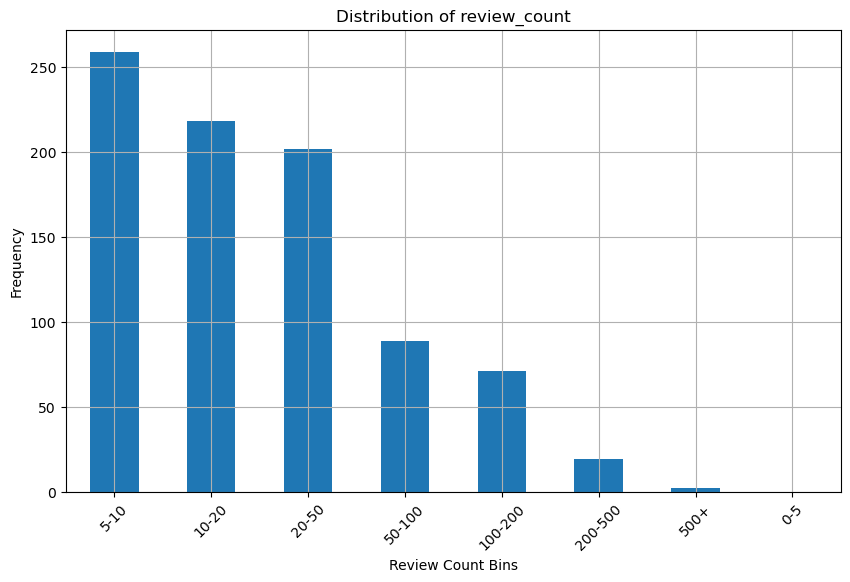

In [26]:
# cluster1_info的评论数饼状图
bins = [0, 5, 10, 20, 50, 100, 200, 500, 1000]
labels = ['0-5', '5-10', '10-20', '20-50', '50-100', '100-200', '200-500', '500+']
cluster1_info['review_count_bins'] = pd.cut(cluster1_info['review_count'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 6))
cluster1_info['review_count_bins'].value_counts().plot(kind='bar')
plt.title('Distribution of review_count')
plt.xlabel('Review Count Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid()

In [27]:
# 计算cluster1里的gem_score
df_cluster1_features['potential_score'] = df_cluster1_features.apply(lambda row: assign_potential_score_by_quantile(row, count_q25, count_median, count_q75), axis=1)
df_cluster1_features['gem_score'] = df_cluster1_features.apply(lambda row: enhance_score(row, row['potential_score']), axis=1)

# 回归
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# 特征选择
features = [
    'attr_score', 'cat_score',
    'std_review_stars_scaled',
    'pos_review_ratio', 'neg_review_ratio', 'neu_review_ratio',
    'long_review_ratio', 'avg_review_length_scaled', 'avg_word_count_scaled',
    'avg_useful_scaled', 'avg_funny_scaled', 'avg_cool_scaled',
    'interact_score_mean_scaled', 'sentiment_score_mean_scaled',
    'recent_review_ratio', 'review_timespan_days_scaled', 'review_burst_score_scaled',
    'avg_user_avg_stars', 'elite_user_ratio', 'avg_user_account_age_days',
    'avg_user_review_count_log_scaled', 'avg_user_useful_log_scaled',
    'avg_user_funny_log_scaled', 'avg_user_cool_log_scaled',
    'avg_user_fans_log_scaled', 'avg_user_compliments_log_scaled'
]

X = df_cluster1_features[features]
y = df_cluster1_features['gem_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.030963063315232072
R^2 Score: 0.7237055334293122


/tmp/ipykernel_91083/3444672288.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


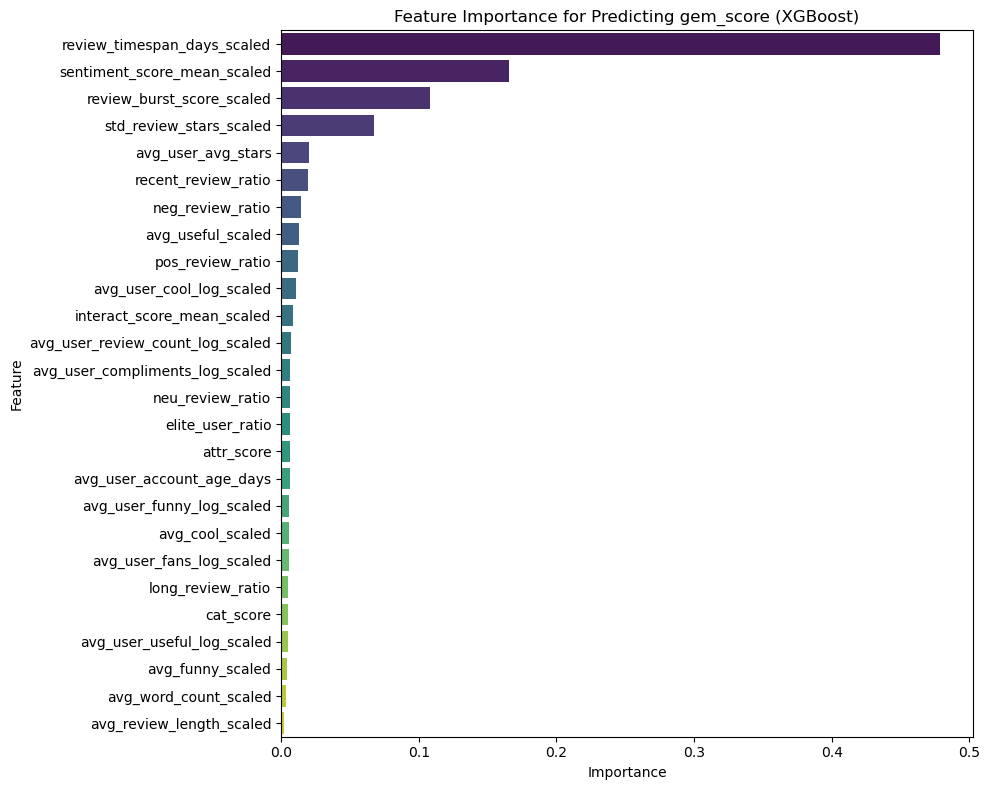

In [28]:
# 特征重要性分析
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 5. 可视化特征重要性
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance for Predicting gem_score (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 6. （可选）保存重要性到CSV
feature_importance_df.to_csv("xgb_feature_importance.csv", index=False)

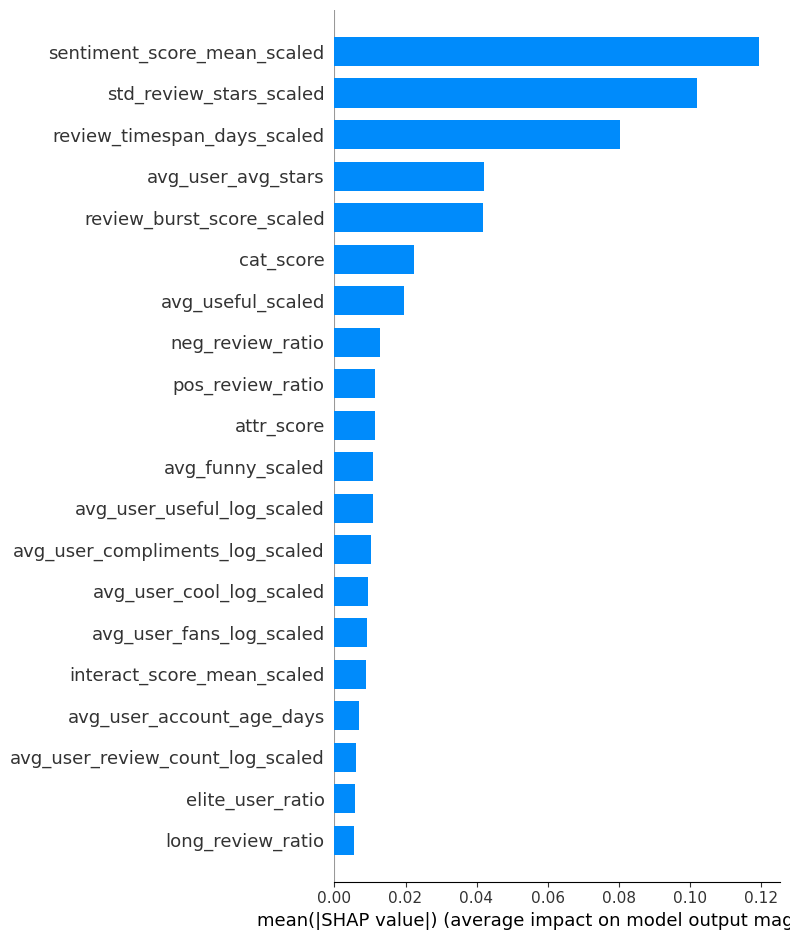

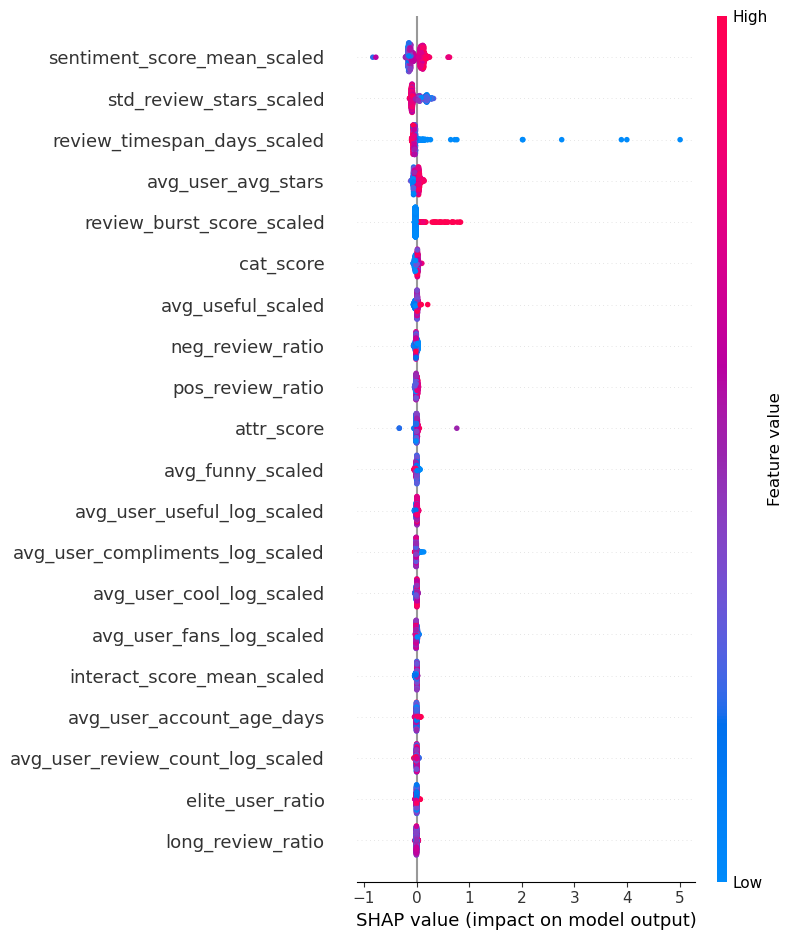

In [38]:
# shap分析
import shap
import shap

# 创建 explainer（只需跑一次）
explainer = shap.Explainer(model)

# 获取 SHAP 值（取训练集为例）
shap_values = explainer(X_train)

# 总体特征影响（正负方向）
shap.summary_plot(shap_values, X_train, plot_type="bar")

# 分布图（数值大小 vs 影响方向）
shap.summary_plot(shap_values, X_train)  # 默认使用“特征值颜色编码”


In [29]:
df_cluster1_features['gem_score'] = model.predict(X)

In [30]:
# 排序
df_cluster1_sorted = df_cluster1_features[['business_id', 'gem_score']].sort_values(by='gem_score', ascending=False)
df_cluster1_sorted = df_cluster1_sorted.reset_index(drop=True)

df_cluster1_sorted.to_csv('business_cluster1_gem_score_sorted.csv', index=False)

In [31]:
cluster1_now_path = '../evaluate/cluster1_now_sorted.csv'
df_cluster1_now = pd.read_csv(cluster1_now_path)
df_cluster1_now


,business_id,stars_now,review_count_now,stars,review_count,increase_stars,increase_review_count,growth_rate_stars,growth_rate_review_count
0,MknwuLhOJ96naxbmm12CPQ,4.5,136,5.0,5,-0.5,131,-0.100000,26.200000
1,QAUKgKkO26KiNa0r1N2DFA,4.0,313,4.5,13,-0.5,300,-0.111111,23.076923
2,kWbCmkx7Pd1kzHDT919FLA,4.5,86,5.0,5,-0.5,81,-0.100000,16.200000
3,qvGoBKNSoW6PW1eE0C3t6A,3.5,85,4.0,5,-0.5,80,-0.125000,16.000000
4,4ihK-CfFXNVIxN_twd63ZQ,4.6,419,4.5,26,0.1,393,0.022222,15.115385
...,...,...,...,...,...,...,...,...,...
855,3yfd4Hn8luhEoGr4Brfc7g,4.0,5,4.0,6,0.0,-1,0.000000,-0.166667
856,WC1dePVfx8dGEeZqyDLmvA,5.0,4,5.0,5,0.0,-1,0.000000,-0.200000
857,0INrDX--UuVvHVKpk4mL5Q,4.4,16,5.0,41,-0.6,-25,-0.120000,-0.609756
858,RhBwli2pHbQELdc-WBDsxw,4.7,16,5.0,42,-0.3,-26,-0.060000,-0.619048


In [32]:
# 添加stars_now,review_count_now,stars,review_count,increase_stars,increase_review_count,growth_rate_stars,growth_rate_review_count
df_cluster1_evaluate = df_cluster1_sorted.merge(df_cluster1_now[['business_id', 'stars_now', 'review_count_now', 'stars', 'review_count', 'increase_stars', 'increase_review_count', 'growth_rate_stars', 'growth_rate_review_count']], on='business_id', how='left')

df_cluster1_evaluate.to_csv('business_cluster1_evaluate.csv', index=False)

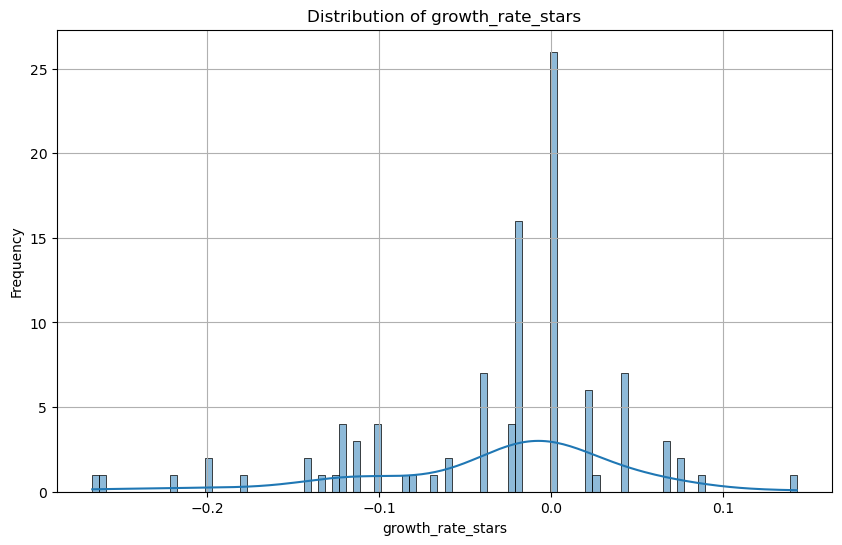

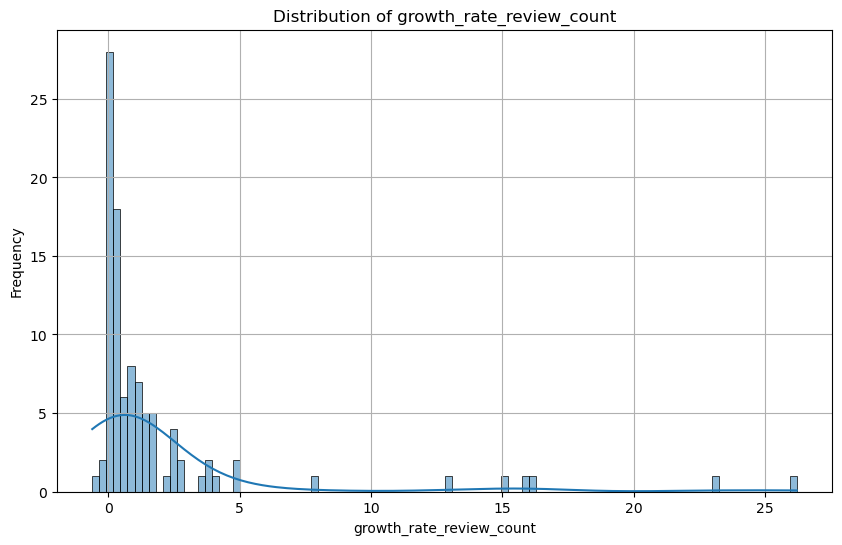

In [33]:
df_cluster1_evaluate_top100 = df_cluster1_evaluate.head(100).copy()
# 计算growth_rate_stars和growth_rate_review_count的分布
plt.figure(figsize=(10, 6))
sns.histplot(df_cluster1_evaluate_top100['growth_rate_stars'], bins=100, kde=True)
plt.title('Distribution of growth_rate_stars')
plt.xlabel('growth_rate_stars')
plt.ylabel('Frequency')
plt.grid()
plt.figure(figsize=(10, 6)) 
sns.histplot(df_cluster1_evaluate_top100['growth_rate_review_count'], bins=100, kde=True)
plt.title('Distribution of growth_rate_review_count')   
plt.xlabel('growth_rate_review_count')
plt.ylabel('Frequency')
plt.grid()

In [34]:
average_increase_stars = df_cluster1_evaluate['increase_stars'].mean()
average_increase_review_count = df_cluster1_evaluate['increase_review_count'].mean()
print(f'average_increase_stars: {average_increase_stars}, average_increase_review_count: {average_increase_review_count}')
average_growth_rate_stars = df_cluster1_evaluate['growth_rate_stars'].mean()
average_growth_rate_review_count = df_cluster1_evaluate['growth_rate_review_count'].mean()
print(f'average_growth_rate_stars: {average_growth_rate_stars}, average_growth_rate_review_count: {average_growth_rate_review_count}')
median_growth_rate_review_count = df_cluster1_evaluate['growth_rate_review_count'].median()
print(f'median_growth_rate_review_count: {median_growth_rate_review_count}')

# 划分为50个bins，给出频数最高的区间
df_cluster1_evaluate['growth_rate_review_count_bins'] = pd.cut(df_cluster1_evaluate['growth_rate_review_count'], bins=50)
# 计算每个区间的频数
growth_rate_review_count_bins_counts = df_cluster1_evaluate['growth_rate_review_count_bins'].value_counts()
# 找到频数最高的区间
max_count_bin = growth_rate_review_count_bins_counts.idxmax()
max_count = growth_rate_review_count_bins_counts.max()
print(f'Max count bin: {max_count_bin}, Max count: {max_count}')

average_increase_stars: -0.05372093023255815, average_increase_review_count: 14.513953488372094
average_growth_rate_stars: -0.010330657069029161, average_growth_rate_review_count: 0.567659501768935
median_growth_rate_review_count: 0.2727272727272727
Max count bin: (0.19, 0.732], Max count: 427


In [35]:
average_increase_stars_top100 = df_cluster1_evaluate_top100['increase_stars'].mean()
average_increase_review_count_top100 = df_cluster1_evaluate_top100['increase_review_count'].mean()
print(f'average_increase_stars: {average_increase_stars_top100}, average_increase_review_count: {average_increase_review_count_top100}')
average_growth_rate_stars_top100 = df_cluster1_evaluate_top100['growth_rate_stars'].mean()
average_growth_rate_review_count_top100 = df_cluster1_evaluate_top100['growth_rate_review_count'].mean()
print(f'average_growth_rate_stars: {average_growth_rate_stars_top100}, average_growth_rate_review_count: {average_growth_rate_review_count_top100}')
median_growth_rate_review_count_top100 = df_cluster1_evaluate_top100['growth_rate_review_count'].median()
print(f'median_growth_rate_review_count: {median_growth_rate_review_count_top100}')
# 划分为50个bins，给出频数最高的区间
df_cluster1_evaluate_top100['growth_rate_review_count_bins'] = pd.cut(df_cluster1_evaluate_top100['growth_rate_review_count'], bins=50)
# 计算每个区间的频数
growth_rate_review_count_bins_counts_top100 = df_cluster1_evaluate_top100['growth_rate_review_count_bins'].value_counts()
# 找到频数最高的区间
max_count_bin_top100 = growth_rate_review_count_bins_counts_top100.idxmax()
max_count_top100 = growth_rate_review_count_bins_counts_top100.max()
print(f'Max count bin top 100: {max_count_bin_top100}, Max count top 100: {max_count_top100}')


average_increase_stars: -0.15399999999999994, average_increase_review_count: 22.82
average_growth_rate_stars: -0.030661904761904748, average_growth_rate_review_count: 1.9939885688054333
median_growth_rate_review_count: 0.488095238095238
Max count bin top 100: (-0.0736, 0.463], Max count top 100: 46


In [36]:
#top100中增长率高于 cluster1 平均值的比例
growth_rate_review_count_top100 = df_cluster1_evaluate_top100[df_cluster1_evaluate_top100['growth_rate_review_count'] > average_growth_rate_review_count]
growth_rate_review_count_top100_count = growth_rate_review_count_top100.shape[0]
growth_rate_review_count_top100_ratio = growth_rate_review_count_top100_count / df_cluster1_evaluate_top100.shape[0]
print(f'growth_rate_review_count_top100_count: {growth_rate_review_count_top100_count}, growth_rate_review_count_top100_ratio: {growth_rate_review_count_top100_ratio}')

growth_rate_review_count_top100_count: 49, growth_rate_review_count_top100_ratio: 0.49


In [37]:
#cluster1中增长率高于 cluster1 平均值的比例
growth_rate_review_count = df_cluster1_evaluate[df_cluster1_evaluate['growth_rate_review_count'] > average_growth_rate_review_count]
growth_rate_review_count_count = growth_rate_review_count.shape[0]
growth_rate_review_count_ratio = growth_rate_review_count_count / df_cluster1_evaluate.shape[0]
print(f'growth_rate_review_count_count: {growth_rate_review_count_count}, growth_rate_review_count_ratio: {growth_rate_review_count_ratio}')

growth_rate_review_count_count: 198, growth_rate_review_count_ratio: 0.2302325581395349


In [40]:
from scipy.stats import pearsonr, spearmanr

r_pearson, p_pearson = pearsonr(df_cluster1_evaluate_top100['gem_score'], df_cluster1_evaluate_top100['growth_rate_review_count'])
r_spearman, p_spearman = spearmanr(df_cluster1_evaluate_top100['gem_score'], df_cluster1_evaluate_top100['growth_rate_review_count'])

print(f"Pearson r={r_pearson:.3f}, p={p_pearson:.3g}")
print(f"Spearman ρ={r_spearman:.3f}, p={p_spearman:.3g}")


Pearson r=0.529, p=1.5e-08
Spearman ρ=0.475, p=6.08e-07


In [41]:
from scipy.stats import mannwhitneyu

top100 = df_cluster1_evaluate_top100['growth_rate_review_count']
df_cluster1_evaluate_not100 = df_cluster1_evaluate[df_cluster1_evaluate['business_id'].isin(df_cluster1_evaluate_top100['business_id']) == False]
others = df_cluster1_evaluate_not100['growth_rate_review_count']

stat, p = mannwhitneyu(top100, others, alternative='two-sided')
print(f"Mann–Whitney U test: U={stat:.1f}, p={p:.3g}")


Mann–Whitney U test: U=47492.5, p=4.77e-05
